In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp

In [129]:
"""NOTE: where include_mag_forces=False, this apparently does not mean
that the magnetic forces are in fact off... the documentation says that
the unitless conventions they use only work when that parameter is False.
""";

## pyLCP Example - conventional 3D $^{87}$Rb MOT

The pyLCP way, using built-in definitions for beams, and goofy units

In [124]:
"""By switching to 87Rb we can bring the repump to resonance, 
and turn down its intensity to 1/100 of the main cooling light.
"""

atom = pylcp.atom("87Rb")

det = -2.0
alpha = 1.0
s = 1.0


H_g_D2, mu_q_g_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[0].J, atom.I, atom.state[0].gJ, atom.gI,
    atom.state[0].Ahfs/atom.state[2].gammaHz, Bhfs=0, Chfs=0,
    muB=1)
H_e_D2, mu_q_e_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[2].J, atom.I, atom.state[2].gJ, atom.gI,
    Ahfs=atom.state[2].Ahfs/atom.state[2].gammaHz,
    Bhfs=atom.state[2].Bhfs/atom.state[2].gammaHz, Chfs=0,
    muB=1)
mu_q_g_D2[1]
dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(
    atom.state[0].J, atom.state[2].J, atom.I)

E_e_D2 = np.unique(np.diagonal(H_e_D2))
E_g_D2 = np.unique(np.diagonal(H_g_D2))

hamiltonian_D2 = pylcp.hamiltonian(H_g_D2, H_e_D2, mu_q_g_D2, 
                                   mu_q_e_D2, dijq_D2)

# Now, we need two sets of laser beams -> one for F=1->2 and one for F=2->3:
laserBeams_cooling_D2 = pylcp.conventional3DMOTBeams(
    s=s, delta=(E_e_D2[-1] - E_g_D2[-1]) + det)
laserBeams_repump_D2 = pylcp.conventional3DMOTBeams(
    s=0.01*s, delta=(E_e_D2[-2] - E_g_D2[-2]))
laserBeams_D2 = laserBeams_cooling_D2 + laserBeams_repump_D2

magField = pylcp.quadrupoleMagneticField(alpha)

In [125]:
"""Construct the full rate equations for the D line:"""

# not clear how the position and velocity have been scaled 
x = np.arange(-5, 5.1, 0.2)
v = np.arange(-5, 5.1, 0.2)

dx = np.mean(np.diff(x))
dv = np.mean(np.diff(v))

X, V = np.meshgrid(x, v)

trap_D2 = pylcp.rateeq(
    laserBeams_D2, magField, hamiltonian_D2,include_mag_forces=False)
trap_D2.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
FzRb_D2 = trap_D2.profile['Fz'].F[2]

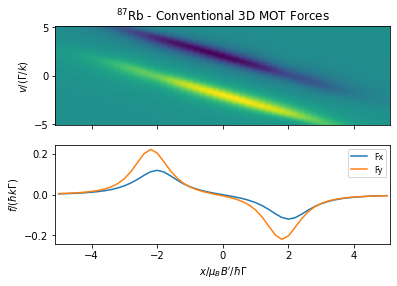

In [126]:
"""Plot the results"""

fig, ax = plt.subplots(2, 1, sharex=True)#, figsize=(1.5*3.25, 1.5*2.75))
ax[0].imshow(FzRb_D2, origin='lower',
               extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
                       np.amin(v)-dv/2, np.amax(v)+dv/2),
               aspect='auto')
# ax[0, 1].imshow(Fz2to3, origin='bottom',
#                extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
#                        np.amin(v)-dv/2, np.amax(v)+dv/2),
#                aspect='auto')
ax[1].plot(X[int(X.shape[0]/2), :],
              FzRb_D2[int(X.shape[0]/2), :],label='Fx')
# ax[1, 0].plot(X[int(X.shape[0]/2), :],
#               Fz2to3[int(X.shape[0]/2), :], '--',
#               linewidth=0.75)
ax[1].plot(V[:, int(X.shape[1]/2)+1],
              FzRb_D2[:, int(X.shape[1]/2)+1], label='Fy')
# ax[1, 1].plot(V[:, int(X.shape[1]/2)+1],
#               Fz2to3[:, int(X.shape[1]/2)+1], '--',
#               label='$F=2 \\rightarrow F\'=3$',
#               linewidth=0.75)

ax[1].legend(fontsize=8)

# [ax[ii, 1].yaxis.set_ticklabels('') for ii in range(2)]
# [ax[0, ii].xaxis.set_ticklabels('') for ii in range(2)]

ax[0].set_title('$^{87}$Rb - Conventional 3D MOT Forces')
ax[0].set_ylabel('$v/(\Gamma/k)$')
ax[1].set_ylabel('$f/(\hbar k \Gamma)$')
ax[1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');
# ax[1, 1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');

"""I believe the force plot is showing the positional force as an atom 
moves along x at y=0 and along y at x=0, and the force imshow shows the force in 
the force as a function of the v-x location in phase-space.

I think the reason for the differing force curve shapes in x,y is the
shape of the quadrupole field along those two directions.
""";

## conventional 3D $^{87}$Rb MOT 

manually defined beams

In [79]:
"""By switching to 87Rb we can bring the repump to resonance, 
and turn down its intensity to 1/100 of the main cooling light.
"""

atom = pylcp.atom("87Rb")

atom = pylcp.atom("87Rb")

det = -2.0
alpha = 1.0
s = 1.0


H_g_D2, mu_q_g_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[0].J, atom.I, atom.state[0].gJ, atom.gI,
    atom.state[0].Ahfs/atom.state[2].gammaHz, Bhfs=0, Chfs=0,
    muB=1)
H_e_D2, mu_q_e_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[2].J, atom.I, atom.state[2].gJ, atom.gI,
    Ahfs=atom.state[2].Ahfs/atom.state[2].gammaHz,
    Bhfs=atom.state[2].Bhfs/atom.state[2].gammaHz, Chfs=0,
    muB=1)
mu_q_g_D2[1]
dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(
    atom.state[0].J, atom.state[2].J, atom.I)

E_e_D2 = np.unique(np.diagonal(H_e_D2))
E_g_D2 = np.unique(np.diagonal(H_g_D2))

hamiltonian_D2 = pylcp.hamiltonian(H_g_D2, H_e_D2, mu_q_g_D2, 
                                   mu_q_e_D2, dijq_D2)

# Define the laser beams:
cooling_det = (E_e_D2[-1] - E_g_D2[-1]) + det # detuned by det from F=2->F'=3
rp_det = (E_e_D2[-2] - E_g_D2[-2]) # resonant w/ F=1->F'=2

k = 1

laserBeams_cooling_D2 = pylcp.laserBeams(
    [
     # X
     {'kvec':k*np.array([1., 0., 0.]), 's':s, 'pol':-1, 'delta':cooling_det},
     {'kvec':k*np.array([-1., 0., 0.]), 's':s, 'pol':-1, 'delta':cooling_det},
     # Y
     {'kvec':k*np.array([0., 1., 0.]), 's':s, 'pol':-1, 'delta':cooling_det},
     {'kvec':k*np.array([0., -1., 0.]), 's':s, 'pol':-1, 'delta':cooling_det},
     # Z
     {'kvec':k*np.array([0., 0., 1.]), 's':s, 'pol':1, 'delta':cooling_det},
     {'kvec':k*np.array([0., 0., -1.]), 's':s, 'pol':1, 'delta':cooling_det}
    ],
    beam_type=pylcp.infinitePlaneWaveBeam
)
 
laserBeams_repump_D2 = pylcp.laserBeams(
    [
     # X
     {'kvec':k*np.array([1., 0., 0.]), 's':s, 'pol':-1, 'delta':rp_det},
     {'kvec':k*np.array([-1., 0., 0.]), 's':s, 'pol':-1, 'delta':rp_det},
     # Y
     {'kvec':k*np.array([0., 1., 0.]), 's':s, 'pol':-1, 'delta':rp_det},
     {'kvec':k*np.array([0., -1., 0.]), 's':s, 'pol':-1, 'delta':rp_det},
     # Z
     {'kvec':k*np.array([0., 0., 1.]), 's':s, 'pol':1, 'delta':rp_det},
     {'kvec':k*np.array([0., 0., -1.]), 's':s, 'pol':1, 'delta':rp_det}
    ],
    beam_type=pylcp.infinitePlaneWaveBeam
)
    
laserBeams_D2 = laserBeams_cooling_D2 + laserBeams_repump_D2

magField = pylcp.quadrupoleMagneticField(alpha)

In [127]:
"""Construct the full rate equations for the D line:"""

# not clear how the position and velocity have been scaled 
x = np.arange(-5, 5.1, 0.2)
v = np.arange(-5, 5.1, 0.2)

dx = np.mean(np.diff(x))
dv = np.mean(np.diff(v))

X, V = np.meshgrid(x, v)

trap_D2 = pylcp.rateeq(
    laserBeams_D2, magField, hamiltonian_D2, include_mag_forces=False)
trap_D2.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
     progress_bar=True)
FzRb_D2 = trap_D2.profile['0'].F[2]

Completed in 8.09 s.                                               


(3, 51, 51)

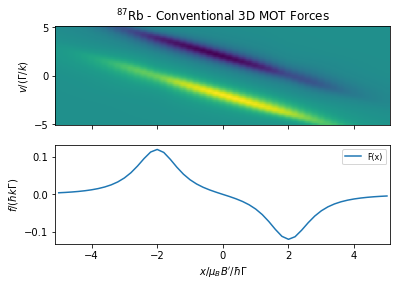

In [133]:
"""Plot the results"""

fig, ax = plt.subplots(2, 1, sharex=True)#, figsize=(1.5*3.25, 1.5*2.75))
ax[0].imshow(FzRb_D2, origin='lower',
               extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
                       np.amin(v)-dv/2, np.amax(v)+dv/2),
               aspect='auto')

ax[1].plot(X[int(X.shape[0]/2), :],
              FzRb_D2[int(X.shape[0]/2), :],label='F(x)')

# ax[1].plot(V[:, int(X.shape[1]/2)+1],
#               FzRb_D2[:, int(X.shape[1]/2)+1], label='F(v)',
#                linewidth=0.75)

ax[1].legend(fontsize=8)

# [ax[ii, 1].yaxis.set_ticklabels('') for ii in range(2)]
# [ax[0, ii].xaxis.set_ticklabels('') for ii in range(2)]

ax[0].set_title('$^{87}$Rb - Conventional 3D MOT Forces')
ax[0].set_ylabel('$v/(\Gamma/k)$')
ax[1].set_ylabel('$f/(\hbar k \Gamma)$')
ax[1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');
# ax[1, 1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');

## conventional 3D $^{87}$Rb MOT - goofy beams

manually defined beams for network node pancake chamber chip

In [4]:
atom = pylcp.atom("87Rb")

det = -2.0
alpha = 1.0
s = 1.0


H_g_D2, mu_q_g_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[0].J, atom.I, atom.state[0].gJ, atom.gI,
    atom.state[0].Ahfs/atom.state[2].gammaHz, Bhfs=0, Chfs=0,
    muB=1)
H_e_D2, mu_q_e_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[2].J, atom.I, atom.state[2].gJ, atom.gI,
    Ahfs=atom.state[2].Ahfs/atom.state[2].gammaHz,
    Bhfs=atom.state[2].Bhfs/atom.state[2].gammaHz, Chfs=0,
    muB=1)
mu_q_g_D2[1]
dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(
    atom.state[0].J, atom.state[2].J, atom.I)

E_e_D2 = np.unique(np.diagonal(H_e_D2))
E_g_D2 = np.unique(np.diagonal(H_g_D2))

hamiltonian_D2 = pylcp.hamiltonian(H_g_D2, H_e_D2, mu_q_g_D2, 
                                   mu_q_e_D2, dijq_D2)

# Define the laser beams:
cooling_det = (E_e_D2[-1] - E_g_D2[-1]) + det # detuned by det from F=2->F'=3
rp_det = (E_e_D2[-2] - E_g_D2[-2]) # resonant w/ F=1->F'=2

# beam unit vectors
th = np.pi*27/180
ph = np.pi*30/180

kx = np.array([np.cos(th), -np.sin(th), 0])
ky = np.array([np.cos(th), np.sin(th), 0])
kz = np.array([0, np.sin(ph), np.cos(ph)])

laserBeams_cooling_D2 = pylcp.laserBeams(
    [
     # X
     {'kvec':kx, 's':s, 'pol':-1, 'delta':cooling_det},
     {'kvec':-kx, 's':s, 'pol':-1, 'delta':cooling_det},
     # Y
     {'kvec':ky, 's':s, 'pol':-1, 'delta':cooling_det},
     {'kvec':-ky, 's':s, 'pol':-1, 'delta':cooling_det},
     # Z
     {'kvec':kz, 's':s, 'pol':1, 'delta':cooling_det},
     {'kvec':-kz, 's':s, 'pol':1, 'delta':cooling_det}
    ],
    beam_type=pylcp.infinitePlaneWaveBeam
)
 
laserBeams_repump_D2 = pylcp.laserBeams(
    [
     # X
     {'kvec':kx, 's':.01*s, 'pol':-1, 'delta':rp_det},
     {'kvec':-kx, 's':.01*s, 'pol':-1, 'delta':rp_det},
     # Y
     {'kvec':ky, 's':.01*s, 'pol':-1, 'delta':rp_det},
     {'kvec':-ky, 's':.01*s, 'pol':-1, 'delta':rp_det},
     # Z
     {'kvec':kz, 's':.01*s, 'pol':1, 'delta':rp_det},
     {'kvec':-kz, 's':.01*s, 'pol':1, 'delta':rp_det}
    ],
    beam_type=pylcp.infinitePlaneWaveBeam
)
    
laserBeams_D2 = laserBeams_cooling_D2 + laserBeams_repump_D2

magField = pylcp.quadrupoleMagneticField(alpha)

In [5]:
kx,ky,kz

(array([ 0.89100652, -0.4539905 ,  0.        ]),
 array([0.89100652, 0.4539905 , 0.        ]),
 array([0.       , 0.5      , 0.8660254]))

In [6]:
"""Construct the full rate equations for the D line:"""

x = np.arange(-5, 5.1, 0.2)
v = np.arange(-5, 5.1, 0.2)

dx = np.mean(np.diff(x))
dv = np.mean(np.diff(v))

X, V = np.meshgrid(x, v)

trap_D2 = pylcp.rateeq(
    laserBeams_D2, magField, hamiltonian_D2, include_mag_forces=False)
trap_D2.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
     progress_bar=True)
force = trap_D2.profile['0'].F[2]

Completed in 4.54 s.                                               


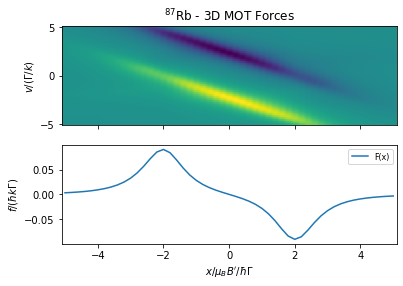

In [7]:
"""Plot the results"""

fig, ax = plt.subplots(2, 1, sharex=True)#, figsize=(1.5*3.25, 1.5*2.75))
ax[0].imshow(force, origin='lower',
               extent=(np.amin(x)-dx/2, np.amax(x)+dx/2,
                       np.amin(v)-dv/2, np.amax(v)+dv/2),
               aspect='auto')

ax[1].plot(X[int(X.shape[0]/2), :],
              force[int(X.shape[0]/2), :],label='F(x)')

# ax[1].plot(V[:, int(X.shape[1]/2)+1],
#               FzRb_D2[:, int(X.shape[1]/2)+1], label='F(v)',
#                linewidth=0.75)

ax[1].legend(fontsize=8)

# [ax[ii, 1].yaxis.set_ticklabels('') for ii in range(2)]
# [ax[0, ii].xaxis.set_ticklabels('') for ii in range(2)]

ax[0].set_title('$^{87}$Rb - 3D MOT Forces')
ax[0].set_ylabel('$v/(\Gamma/k)$')
ax[1].set_ylabel('$f/(\hbar k \Gamma)$')
ax[1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');
# ax[1, 1].set_xlabel('$x/\mu_B B\'/\hbar\Gamma$');